In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('../datasets/test-annotations-bbox.csv', sep = ',', engine = 'python')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data
# Выкинем лишнее, на начальном этапе нам не важны эти поля, т.к. они либо не нужны, либо совпадают
data = data.drop(('ImageID'), axis = 1)
data = data.drop(('Source'), axis = 1)
data = data.drop(('Confidence'), axis = 1)

In [5]:
print(data)

         LabelName      XMin      XMax      YMin      YMax  IsOccluded  \
0         /m/07j7r  0.071875  0.145313  0.206250  0.391667           0   
1         /m/07j7r  0.439063  0.571875  0.264583  0.435417           0   
2         /m/07j7r  0.668750  1.000000  0.000000  0.552083           0   
3         /m/015p6  0.206208  0.849224  0.154639  1.000000           0   
4         /m/05s2s  0.137472  0.376940  0.000000  0.883652           1   
...            ...       ...       ...       ...       ...         ...   
937322    /m/04rky  0.903736  0.998563  0.347727  0.609091           1   
937323  /m/0cnyhnx  0.012931  0.227011  0.368182  0.602273           0   
937324  /m/0cnyhnx  0.512931  0.632184  0.465909  0.600000           0   
937325    /m/04yx4  0.047414  0.995690  0.293182  0.784091           0   
937326   /m/01g317  0.000000  1.000000  0.000000  1.000000           1   

        IsTruncated  IsGroupOf  IsDepiction  IsInside  
0                 1          1            0         0  

In [6]:
data.head()

,LabelName,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,/m/07j7r,0.071875,0.145313,0.206250,0.391667,0,1,1,0,0
1,/m/07j7r,0.439063,0.571875,0.264583,0.435417,0,1,1,0,0
2,/m/07j7r,0.668750,1.000000,0.000000,0.552083,0,1,1,0,0
3,/m/015p6,0.206208,0.849224,0.154639,1.000000,0,0,0,0,0
4,/m/05s2s,0.137472,0.376940,0.000000,0.883652,1,1,0,0,0


In [7]:
data.tail()

,LabelName,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
937322,/m/04rky,0.903736,0.998563,0.347727,0.609091,1,1,0,0,0
937323,/m/0cnyhnx,0.012931,0.227011,0.368182,0.602273,0,0,0,0,0
937324,/m/0cnyhnx,0.512931,0.632184,0.465909,0.600000,0,0,0,0,0
937325,/m/04yx4,0.047414,0.995690,0.293182,0.784091,0,0,1,1,0
937326,/m/01g317,0.000000,1.000000,0.000000,1.000000,1,0,1,0,0


In [8]:
print(data.shape)
print(data.columns)

(937327, 10)
Index(['LabelName', 'XMin', 'XMax', 'YMin', 'YMax', 'IsOccluded',
       'IsTruncated', 'IsGroupOf', 'IsDepiction', 'IsInside'],
      dtype='object')


In [9]:
data.index

RangeIndex(start=0, stop=937327, step=1)

In [10]:
data.at[2, 'XMin']

0.66875

In [11]:
data['LabelName']

0           /m/07j7r
1           /m/07j7r
2           /m/07j7r
3           /m/015p6
4           /m/05s2s
             ...    
937322      /m/04rky
937323    /m/0cnyhnx
937324    /m/0cnyhnx
937325      /m/04yx4
937326     /m/01g317
Name: LabelName, Length: 937327, dtype: object

In [12]:
data['LabelName'][2]

'/m/07j7r'

In [13]:
data['LabelName'].dtype.name

'object'

In [14]:
type(data['LabelName'][2])

str

In [15]:
type(data['LabelName'])


pandas.core.series.Series

In [16]:
data[['LabelName', 'XMin']].head()


,LabelName,XMin
0,/m/07j7r,0.071875
1,/m/07j7r,0.439063
2,/m/07j7r,0.668750
3,/m/015p6,0.206208
4,/m/05s2s,0.137472


In [17]:
data.describe()

,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
count,937327.000000,937327.000000,937327.000000,937327.000000,937327.000000,937327.000000,937327.000000,937327.000000,937327.000000
mean,0.360932,0.639071,0.324401,0.650945,0.445307,0.225889,0.086455,0.046983,0.007430
std,0.284059,0.284184,0.244283,0.272963,0.497000,0.418167,0.281036,0.211602,0.085875
min,0.000000,0.001563,0.000000,0.001563,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.098820,0.416667,0.117500,0.429603,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.330465,0.668998,0.294900,0.674058,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.582812,0.901903,0.498891,0.906874,1.000000,0.000000,0.000000,0.000000,0.000000
max,0.998525,1.000000,0.995575,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### уменьшим датасет, т.к. он слишком большой и все выполняется очень долго

In [18]:
data = data.iloc[1:10000, :]
data = data.copy()

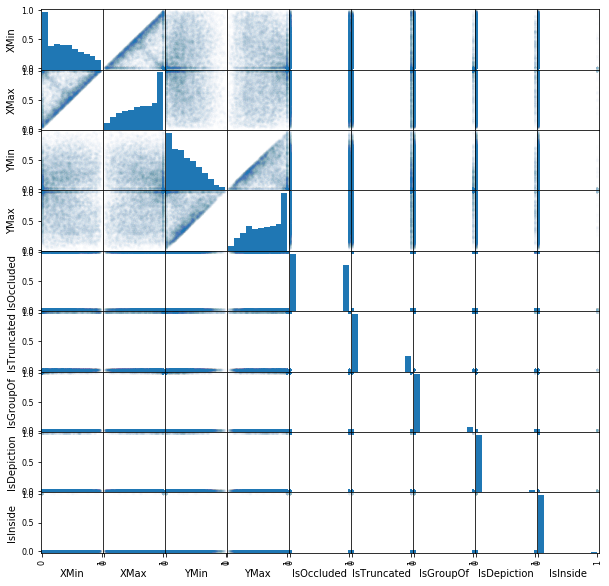

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

In [20]:
data.corr()

,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
XMin,1.000000,0.445631,0.202794,-0.281759,0.108577,-0.139081,-0.199714,0.006279,-0.064759
XMax,0.445631,1.000000,-0.209829,0.271745,-0.134825,0.143902,0.193551,-0.010301,0.063952
YMin,0.202794,-0.209829,1.000000,0.313542,0.056709,-0.144652,-0.147377,0.007000,-0.067423
YMax,-0.281759,0.271745,0.313542,1.000000,-0.153163,0.206806,0.097809,-0.019277,0.058581
IsOccluded,0.108577,-0.134825,0.056709,-0.153163,1.000000,-0.020860,-0.044308,-0.053576,-0.050554
IsTruncated,-0.139081,0.143902,-0.144652,0.206806,-0.020860,1.000000,0.075219,-0.047497,0.044217
IsGroupOf,-0.199714,0.193551,-0.147377,0.097809,-0.044308,0.075219,1.000000,-0.014855,-0.024477
IsDepiction,0.006279,-0.010301,0.007000,-0.019277,-0.053576,-0.047497,-0.014855,1.000000,-0.011467
IsInside,-0.064759,0.063952,-0.067423,0.058581,-0.050554,0.044217,-0.024477,-0.011467,1.000000


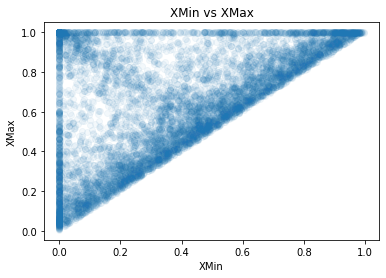

In [21]:
plt.plot(data['XMin'], data['XMax'], 'o', alpha = 0.05)
plt.xlabel('XMin')
plt.ylabel('XMax')
plt.title('XMin vs XMax')
pass

In [22]:
data['IsTruncated'] == 1

1        True
2        True
3       False
4        True
5        True
        ...  
9995     True
9996     True
9997    False
9998    False
9999    False
Name: IsTruncated, Length: 9999, dtype: bool

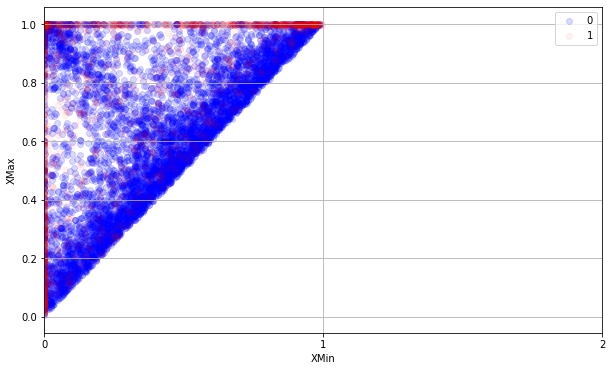

In [23]:

plt.figure(figsize = (10, 6))

plt.scatter(data[data['IsTruncated'] == 0]['XMin'],
            data[data['IsTruncated'] == 0]['XMax'],
            alpha = 0.15,
            label = '0',
            color = 'b')

plt.scatter(data[data['IsTruncated'] == 1]['XMin'],
            data[data['IsTruncated'] == 1]['XMax'],
            alpha = 0.05,
            label = '1',
            color = 'r')

plt.xlabel('XMin')
plt.xticks(range(4))
plt.xlim(0, 2)
plt.ylabel('XMax')
plt.legend()
plt.grid()

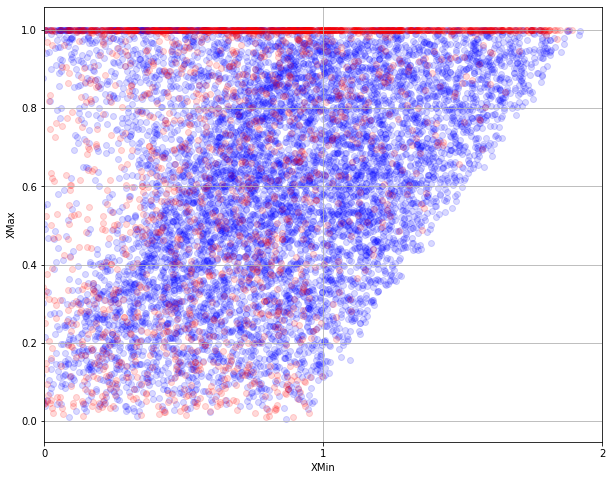

In [24]:
np.random.seed(0)
education_num_rnd = data['XMin'] + np.random.rand(data.shape[0]) - .05

plt.figure(figsize = (10, 8))

plt.scatter(education_num_rnd[data['IsTruncated'] == 0],
            data[data['IsTruncated'] == 0]['XMax'],
            alpha = 0.15,
            label = '0',
            color = 'b')

plt.scatter(education_num_rnd[data['IsTruncated'] == 1],
            data[data['IsTruncated'] == 1]['XMax'],
            alpha = 0.15,
            label = '1',
            color = 'r')

plt.xlabel('XMin')
plt.xticks(range(4))
plt.xlim(0, 2)
plt.ylabel('XMax')
plt.title('')
plt.grid()

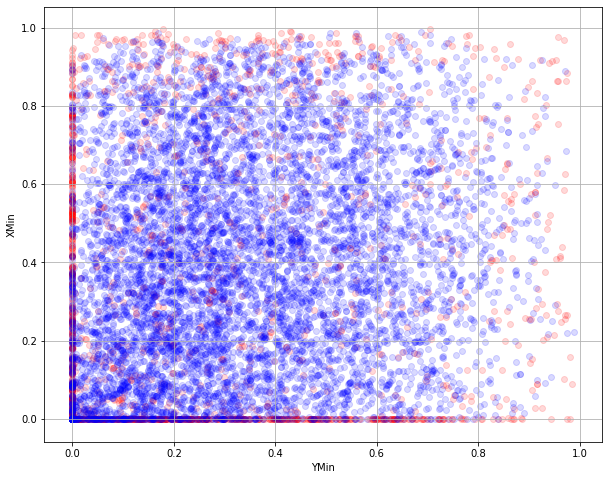

In [25]:

plt.figure(figsize = (10, 8))

plt.scatter(data[data['IsTruncated'] == 1]['YMin'],
            data[data['IsTruncated'] == 1]['XMin'],
            alpha = 0.15,
            label = '0',
            color = 'r')

plt.scatter(data[data['IsTruncated'] == 0]['YMin'],
            data[data['IsTruncated'] == 0]['XMin'],
            alpha = 0.15,
            label = '1',
            color = 'b')

plt.xlabel('YMin')
plt.ylabel('XMin')
plt.grid()

In [26]:
data.describe(include = ['object'])

,LabelName
count,9999
unique,366
top,/m/09j2d
freq,643


In [27]:
data.describe(include = 'all')


,LabelName,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
count,9999,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
unique,366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,/m/09j2d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.368555,0.639595,0.310962,0.641173,0.444544,0.216122,0.082708,0.044004,0.006601
std,NaN,0.286683,0.283100,0.234980,0.275102,0.496940,0.411619,0.275455,0.205115,0.080980
min,NaN,0.000000,0.004687,0.000000,0.014583,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.102973,0.413755,0.119293,0.408371,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.337758,0.668142,0.275000,0.662242,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,0.590218,0.899807,0.474963,0.893750,1.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
data['YMax'].unique()


array([0.43541667, 0.5520833 , 1.        , ..., 0.6935123 , 0.93501806,
       0.12610619])

In [29]:
data['IsTruncated'].unique()

array([1, 0], dtype=int64)

In [30]:
for name in data['YMax'].unique():
    print(name, data['IsTruncated'][data['YMax'] == name].iloc[0])

0.43541667 1
0.5520833 1
1.0 0
0.88365245 1
0.6902655 1
0.46238938 0
0.48893806 0
0.65707964 1
0.044247787000000004 1
0.42083332 0
0.41041666 0
0.3 0
0.29583332 0
0.34583333 0
0.31875 0
0.43958333 0
0.40833333 0
0.36458334 0
0.23541667 0
0.35 0
0.44166666 0
0.99791664 1
0.98541665 0
0.41666666 0
0.30208334 0
0.39375 0
0.80833334 0
0.69166666 0
0.62083334 0
0.68333334 0
0.8520833000000001 0
0.32310468 0
0.31949458 0
0.46209386 0
0.39711192 0
0.8333333 1
0.27083334 0
0.27291667 0
0.26875 0
0.28958333 0
0.32291666 1
0.35208333 1
0.43333334 0
0.26666668 0
0.29791668 0
0.38541666 0
0.94166666 0
0.4375 0
0.37916666 0
0.24791667 1
0.7916667 0
0.6458333 1
0.5243363 1
0.78539824 1
0.50663716 0
0.7323009 0
0.6526549 0
0.82522124 0
0.5287611 0
0.7234513000000001 1
0.9380530999999999 1
0.99557525 1
0.5199115 0
0.8185840999999999 0
0.8625277 0
0.99336284 0
0.6858407 1
0.80088496 1
0.39380529999999997 1
0.82743365 0
0.8716814 0
0.41592920000000005 0
0.42256638 0
0.90707964 0
0.42920354 0
0.95353985 

0.33259425 1
0.4345898 0
0.58093125 0
0.36363637 0
0.47450109999999995 0
0.32594234 1
0.72283816 0
0.47671840000000004 0
0.67405766 0
0.37694013 0
0.59423506 0
0.43237250000000005 0
0.7206209 0
0.67184037 0
0.49889135 0
0.70953435 0
0.7960089 0
0.81152993 0
0.6407982 0
0.4878049 0
0.18847007 0
0.50332594 0
0.54988915 0
0.85809314 0
0.46119735 0
0.6141907 0
0.75831485 1
0.45676276 0
0.57427937 0
0.71875 0
0.76666665 0
0.7583333000000001 0
0.7604167 0
0.8783186 0
0.8738938 0
0.8761062 0
0.88274336 0
0.8141593 0
0.8296459999999999 0
0.8362832 0
0.86504424 0
0.86946905 0
0.6061947 0
0.5995575 0
0.71902657 0
0.49115044 0
0.4579646 0
0.86725664 0
0.5210643 0
0.67849225 1
0.83592016 0
0.9534368000000001 1
0.41241685 0
0.96230596 0
0.72727275 0
0.9600886999999999 0
0.83148557 0
0.9963964 1
0.5675676 0
0.5603604 0
0.9981982 1
0.34878588 0
0.87637967 0
0.5386313 0
0.86092716 0
0.8697572 0
0.8631346999999999 0
0.43929359999999995 0
0.42825606 0
0.47019866 0
0.47461369999999997 0
0.27152318 0
0.85

0.49913943 0
0.5025818 0
0.99655765 1
0.6385542 0
0.68158346 0
0.5094664000000001 0
0.36316696 0
0.40791738 0
0.41135973 0
0.7194491999999999 0
0.65920824 0
0.5817555999999999 0
0.7969019 0
0.5442478000000001 0
0.5575220999999999 0
0.54646015 0
0.55309737 0
0.82300884 0
0.5641593 1
0.7920354000000001 0
0.79867256 0
0.57708335 0
0.9358407 0
0.6438053 0
0.6017699000000001 0
0.70132744 0
0.8548813 0
0.9155673000000001 1
0.46437994 0
0.7440633000000001 0
0.4828496 0
0.7783641 0
0.87598944 0
0.7572559 0
0.84960425 0
0.8601583 0
0.7546174 0
0.82849604 0
0.48812664 0
0.7862796999999999 0
0.9958505999999999 1
0.9502075000000001 0
0.2053942 1
0.9087136999999998 0
0.20208333 1
0.18125 1
0.9867256999999999 1
0.46017700000000006 1
0.46460176 1
0.53364635 0
0.53208137 0
0.5367761999999999 0
0.37245697 0
0.5492958 0
0.5482912 0
0.5007429 0
0.9806834999999999 1
0.95690936 0
0.9821694 1
0.58098066 0
0.39791667 0
0.37280703 0
0.9985379999999999 0
0.99707603 1
0.40497077 0
0.4751462 0
0.47076023 0
0.735

0.7941176 0
0.6514706 0
0.49264705 1
0.27941176 0
0.5485294 0
0.8132353 0
0.6455882 0
0.43970588 0
0.43088236 0
0.9970588 1
0.6382353000000001 0
0.8147059 0
0.99264705 1
0.77916664 0
0.55625 0
0.108333334 0
0.8862434000000001 0
0.56084657 1
0.73544973 0
0.87830687 1
0.26931107 0
0.30480167 0
0.35908142 0
0.8663883 0
0.7286013000000001 0
0.36116909999999997 0
0.8517745000000001 0
0.9352818000000002 0
0.84968686 0
0.7682671999999999 0
0.36325678 0
0.32150313 0
0.21294363 0
0.2045929 0
0.26722340000000006 0
0.31524009999999997 0
0.18580376 0
0.24843423 0
0.75782883 0
0.93319416 0
0.27348644 0
0.29853863 0
0.31315240000000005 0
0.34446764 0
0.30688936 0
0.19415449 0
0.15198238 1
0.019823788000000002 1
0.30616740000000003 0
0.68061674 1
0.024229076000000002 0
0.21585903 0
0.40969163 1
0.9030836999999999 0
0.99779737 0
0.9669603999999999 1
0.98237884 0
0.75550663 0
0.6387665 0
0.50220263 0
0.99559474 1
0.5770925 0
0.6629956 0
0.59030837 0
0.6365639 0
0.8325991 0
0.938326 0
0.97356826 0
0.691

0.43426883 1
0.872 0
0.9904 0
0.9840000000000001 0
0.99774265 1
0.22121896 0
0.5778781 0
0.70654625 0
0.50564337 0
0.22799097 0
0.23250565 0
0.62528217 0
0.21218961 1
0.75395036 0
0.54401803 1
0.23024829999999996 1
0.241535 1
0.6275395 0
0.72911966 0
0.5349887 0
0.3544018 0
0.13995485 0
0.33860046 0
0.35214448 0
0.79458237 0
0.6388262 0
0.6478555 0
0.6455982 0
0.26862302 0
0.59142214 0
0.44920993 0
0.44469526 0
0.76975167 0
0.7381489999999999 0
0.73137695 0
0.21896163 0
0.7562076999999999 0
0.5462754 1
0.13769752 1
0.22573364 1
0.99572647 1
0.9389978000000001 0
0.48801744 0
0.8845315999999999 0
0.5054466 0
0.8801743000000001 0
0.49455340000000003 0
0.89106756 0
0.9144542999999999 0
0.9520295 0
0.9314159 0
0.81666666 0
0.34791666 0
0.59375 0
0.8208333000000001 0
0.88520974 1
0.7792494000000001 0
0.5474614000000001 0
0.40265486 0
0.7898229999999999 1
0.43572986 1
0.1459695 0
0.88235295 0
0.18082789 0
0.23965141 0
0.13943355 0
0.6427015 0
0.13725491 0
0.16122004 0
0.16557734 0
0.16993465 

0.26879272 0
0.29157177 0
0.3735763 0
0.97494304 0
0.9544419 0
0.9384966 0
0.9407745000000001 0
0.97266513 0
0.9521639999999999 0
0.99316627 0
0.96355355 0
0.9498860999999998 0
0.92938495 0
0.96127564 0
0.9430523999999999 0
0.9476082 0
0.9589976999999998 0
0.70387244 0
0.9567198 0
0.9863325999999999 0
0.4081238 1
0.22437137 0
0.78723407 0
0.22823985 0
0.82011604 0
0.061946902000000005 1
0.16592920000000003 0
0.24583334 0
0.8183716 1
0.18162839 0
0.60751563 1
0.12526096 0
0.66805845 1
0.8580376000000001 1
0.55114824 0
0.8935018 0
0.7796875 0
0.5187638 0
0.69757175 0
0.70419425 1
0.45916116 0
0.6379691 1
0.51655626 0
0.83813745 0
0.78348213 0
0.8058036 0
0.81696427 0
0.81473213 0
0.5154867 0
0.94045174 0
0.64723927 0
0.6947853 0
0.6457055 0
0.65797544 1
0.89169675 1
0.14874816 0
0.11782032 0
0.281296 0
0.35787922 0
0.34904270000000004 0
0.35493374 0
0.34462446 0
0.3622975 0
0.36082473 0
0.2945508 1
0.30044183 0
0.35640648 0
0.27540502 1
0.28718704 0
0.2827688 0
0.6384 0
0.8096 0
0.6368 0

0.821875 0
0.5859375 0
0.3421875 0
0.9171875 0
0.8703125 0
0.5921875 0
0.4265625 0
0.403125 0
0.6805054 0
0.9453125 0
0.15299335 1
0.2572062 1
0.58536583 0
0.80931264 0
0.9677418999999999 0
0.627957 0
0.83480823 0
0.946875 0
0.75965667 1
0.99785405 0
0.5212121 0
0.6777042 0
0.36203090000000004 1
0.777042 0
0.65342164 0
0.6754967 1
0.589404 0
0.74613684 1
0.48565122 0
0.57836646 0
0.7439294 0
0.9337747999999999 0
0.73068434 0
0.9315673000000001 0
0.7704194000000001 0
0.7152318 0
0.78807944 0
0.9293598 0
0.7969095 1
0.7350993 0
0.6048564999999999 0
0.78145695 1
0.68070954 0
0.3968958 0
0.18625277 1
0.45898005 0
0.9314079 0
0.9807691999999999 0
0.44230768 1
0.99038464 0
0.9179601000000001 0
0.6186253 0
0.73309606 0
0.9756098 0
0.34146342 0
0.31707317 0
0.29711753 0
0.24168514 0
0.27716187 0
0.31485587 0
0.41463414 0
0.05764967 0
0.20842572 0
0.15742794 0
0.1286031 0
0.14634146 0
0.14412417 0
0.60108304 1
0.8057395 0
0.77262694 1
0.8013245 0
0.7682119000000001 1
0.32359082 1
0.2881002 0
0.

In [31]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
#числовые в этом датасете == флоты, т.к. инты - бинарные
numerical_columns   = [c for c in data.columns if data[c].dtype.name == 'float64']
print(categorical_columns)
print(numerical_columns)

['LabelName']
['XMin', 'XMax', 'YMin', 'YMax']


In [32]:
for c in categorical_columns:
    print(c, data[c].unique())

LabelName ['/m/07j7r' '/m/015p6' '/m/05s2s' '/m/0k4j' '/m/07yv9' '/m/0dzct'
 '/m/03q69' '/m/0cgh4' '/m/05r655' '/m/01g317' '/m/09j2d' '/m/02p0tk3'
 '/m/04hgtk' '/m/0283dt1' '/m/0dzf4' '/m/03bt1vf' '/m/0k0pj' '/m/0c9ph5'
 '/m/018xm' '/m/04rky' '/m/09b5t' '/m/05zsy' '/m/0dv77' '/m/02xwb'
 '/m/03120' '/m/01_bhs' '/m/02y6n' '/m/0284d' '/m/01ww8y' '/m/0cxn2'
 '/m/0270h' '/m/083kb' '/m/0138tl' '/m/035r7c' '/m/0h8mhzd' '/m/0k65p'
 '/m/05y5lj' '/m/04yx4' '/m/01d40f' '/m/0463sg' '/m/01lcw4' '/m/07r04'
 '/m/0h9mv' '/m/08dz3q' '/m/0d4v4' '/m/083wq' '/m/015h_t' '/m/01prls'
 '/m/02wbm' '/m/0bt9lr' '/m/09kmb' '/m/03vt0' '/m/014sv8' '/m/0cyhj_'
 '/m/01h3n' '/m/0c_jw' '/m/04bcr3' '/m/09kx5' '/m/01r546' '/m/05z55'
 '/m/09j5n' '/m/01xq0k1' '/m/0cnyhnx' '/m/04_sv' '/m/0zvk5' '/m/052lwg6'
 '/m/0cdn1' '/m/07mhn' '/m/01xyhv' '/m/01mzpv' '/m/02wbtzl' '/m/02cvgx'
 '/m/0kpqd' '/m/01jfm_' '/m/0199g' '/m/01bl7v' '/m/0bjyj5' '/m/014j1m'
 '/m/05n4y' '/m/06c54' '/m/039xj_' '/m/019jd' '/m/014y4n' '/m/01xs3r'
 '/m/07

In [33]:
data[numerical_columns].count(axis = 0)

XMin    9999
XMax    9999
YMin    9999
YMax    9999
dtype: int64

In [34]:
data[categorical_columns].count(axis = 0)


LabelName    9999
dtype: int64

In [35]:
data.describe(include = [object])

,LabelName
count,9999
unique,366
top,/m/09j2d
freq,643


In [36]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [37]:
data.describe(include = [object])

,LabelName
count,9999
unique,366
top,/m/09j2d
freq,643


### Векторизация

In [38]:
# В интах лежат бинарные признаки
binary_columns = [c for c in data.columns if data[c].dtype.name == 'int64']
# Лейблы
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['IsOccluded', 'IsTruncated', 'IsGroupOf', 'IsDepiction', 'IsInside'] ['LabelName']


In [39]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)


Index(['LabelName_/m/011k07', 'LabelName_/m/0120dh', 'LabelName_/m/01226z',
       'LabelName_/m/012n7d', 'LabelName_/m/012w5l', 'LabelName_/m/0130jx',
       'LabelName_/m/0138tl', 'LabelName_/m/013y1f', 'LabelName_/m/01432t',
       'LabelName_/m/014j1m',
       ...
       'LabelName_/m/0l3ms', 'LabelName_/m/0ll1f78', 'LabelName_/m/0llzx',
       'LabelName_/m/0n28_', 'LabelName_/m/0nl46', 'LabelName_/m/0pcr',
       'LabelName_/m/0pg52', 'LabelName_/m/0ph39', 'LabelName_/m/0qmmr',
       'LabelName_/m/0zvk5'],
      dtype='object', length=366)


### Нормализация

In [40]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,XMin,XMax,YMin,YMax
count,9999.000000,9999.000000,9999.000000,9999.000000
mean,0.368555,0.639595,0.310962,0.641173
std,0.286683,0.283100,0.234980,0.275102
min,0.000000,0.004687,0.000000,0.014583
25%,0.102973,0.413755,0.119293,0.408371
50%,0.337758,0.668142,0.275000,0.662242
75%,0.590218,0.899807,0.474963,0.893750
max,0.995575,1.000000,0.988201,1.000000


In [41]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)


In [42]:
data_numerical.describe()


,XMin,XMax,YMin,YMax
count,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03
mean,1.473813e-15,1.408437e-15,-1.443967e-15,1.303266e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.285583e+00,-2.242694e+00,-1.323358e+00,-2.277663e+00
25%,-9.263965e-01,-7.977381e-01,-8.156841e-01,-8.462386e-01
50%,-1.074242e-01,1.008362e-01,-1.530442e-01,7.658697e-02
75%,7.732000e-01,9.191520e-01,6.979363e-01,9.181229e-01
max,2.187156e+00,1.273065e+00,2.882114e+00,1.304343e+00


### Соединяем

In [43]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)

print(data.shape)
print(data.columns)

(9999, 375)
Index(['XMin', 'XMax', 'YMin', 'YMax', 'LabelName_/m/011k07',
       'LabelName_/m/0120dh', 'LabelName_/m/01226z', 'LabelName_/m/012n7d',
       'LabelName_/m/012w5l', 'LabelName_/m/0130jx',
       ...
       'LabelName_/m/0pcr', 'LabelName_/m/0pg52', 'LabelName_/m/0ph39',
       'LabelName_/m/0qmmr', 'LabelName_/m/0zvk5', 'IsOccluded', 'IsTruncated',
       'IsGroupOf', 'IsDepiction', 'IsInside'],
      dtype='object', length=375)


In [44]:
data.describe()

,XMin,XMax,YMin,YMax,LabelName_/m/011k07,LabelName_/m/0120dh,LabelName_/m/01226z,LabelName_/m/012n7d,LabelName_/m/012w5l,LabelName_/m/0130jx,...,LabelName_/m/0pcr,LabelName_/m/0pg52,LabelName_/m/0ph39,LabelName_/m/0qmmr,LabelName_/m/0zvk5,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
count,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.00000,...,9999.00000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,1.473813e-15,1.408437e-15,-1.443967e-15,1.303266e-15,0.000100,0.000100,0.000200,0.000100,0.000200,0.00030,...,0.00030,0.000100,0.000100,0.001400,0.002000,0.444544,0.216122,0.082708,0.044004,0.006601
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.010001,0.010001,0.014142,0.010001,0.014142,0.01732,...,0.01732,0.010001,0.010001,0.037394,0.044681,0.496940,0.411619,0.275455,0.205115,0.080980
min,-1.285583e+00,-2.242694e+00,-1.323358e+00,-2.277663e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-9.263965e-01,-7.977381e-01,-8.156841e-01,-8.462386e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.074242e-01,1.008362e-01,-1.530442e-01,7.658697e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.732000e-01,9.191520e-01,6.979363e-01,9.181229e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.187156e+00,1.273065e+00,2.882114e+00,1.304343e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
X = data.drop(('IsTruncated'), axis = 1)
y = data['IsTruncated']
feature_names = X.columns

In [46]:
type(feature_names)


pandas.core.indexes.base.Index

In [47]:
feature_names


Index(['XMin', 'XMax', 'YMin', 'YMax', 'LabelName_/m/011k07',
       'LabelName_/m/0120dh', 'LabelName_/m/01226z', 'LabelName_/m/012n7d',
       'LabelName_/m/012w5l', 'LabelName_/m/0130jx',
       ...
       'LabelName_/m/0nl46', 'LabelName_/m/0pcr', 'LabelName_/m/0pg52',
       'LabelName_/m/0ph39', 'LabelName_/m/0qmmr', 'LabelName_/m/0zvk5',
       'IsOccluded', 'IsGroupOf', 'IsDepiction', 'IsInside'],
      dtype='object', length=374)

In [48]:
print(X.shape)
print(y.shape)
N, d = X.shape

(9999, 374)
(9999,)


In [49]:
type(X)

pandas.core.frame.DataFrame

In [50]:
type(y)

pandas.core.series.Series

### kNN

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

6999 3000


In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [53]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [54]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.14016288041148736 0.175


In [55]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[2232  100]
 [ 425  243]]


In [56]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]], dtype=int64)

In [57]:
# Подбор

from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10) #Подборка параметров
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print("The smallest error " + str(best_cv_err))
print("n count " + str(best_n_neighbors))

The smallest error 0.1640234319188455
n count 5


In [58]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print("Train err: " + str(err_train)) 
print("Test err: " + str(err_test))

Train err: 0.11701671667381054
Test err: 0.178


### SVC

In [59]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

c:\users\nessi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.21331618802686098 0.22266666666666668


### Random Forest

In [60]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.002857551078725532 0.10366666666666667


In [61]:
a=[1,2,5,70,32,3,4,7,234, 3]
a[-1:3:-1]

[3, 234, 7, 4, 3, 32]

In [62]:
np.sum(rf.feature_importances_)


1.0

In [63]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
 1. feature ' YMax' (0.225462)
 2. feature ' XMax' (0.199625)
 3. feature ' XMin' (0.196646)
 4. feature ' YMin' (0.154932)
 5. feature 'IsGroupOf' (0.017543)
 6. feature 'IsOccluded' (0.016872)
 7. feature 'LabelName_/m/02p0tk3' (0.007646)
 8. feature 'LabelName_/m/07j7r' (0.006767)
 9. feature 'LabelName_/m/01g317' (0.005472)
10. feature 'LabelName_/m/04rky' (0.005344)
11. feature 'LabelName_/m/09j2d' (0.005207)
12. feature 'LabelName_/m/05s2s' (0.005166)
13. feature 'IsDepiction' (0.004708)
14. feature 'LabelName_/m/0k4j' (0.004671)
15. feature 'LabelName_/m/04bcr3' (0.004300)
16. feature 'LabelName_/m/0dzf4' (0.004163)
17. feature 'LabelName_/m/04yx4' (0.004132)
18. feature 'LabelName_/m/0cgh4' (0.003995)
19. feature 'LabelName_/m/083wq' (0.003842)
20. feature 'LabelName_/m/0c9ph5' (0.003392)
21. feature 'LabelName_/m/035r7c' (0.002789)
22. feature 'LabelName_/m/03q69' (0.002777)
23. feature 'LabelName_/m/03bt1vf' (0.002671)
24. feature 'LabelName_/m/0d4v4' (0.0026

In [64]:
feature_names[[1,0,1]]

Index(['XMax', 'XMin', 'XMax'], dtype='object')

(-1, 20)

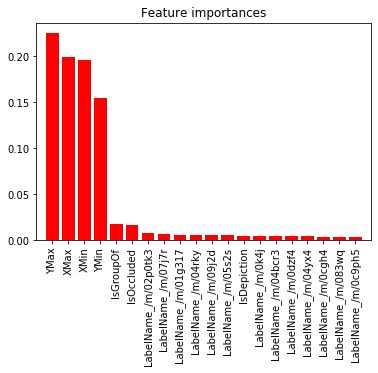

In [65]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

### Extremely Randomized Trees

In [66]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.002857551078725532 0.14366666666666666


### AdaBoost

In [67]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.11601657379625661 0.159


### GBT

In [68]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.043149021288755536 0.10966666666666666


## PCA 
Используем для сокращения размерности до 2.

In [69]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_PCA = pca.fit_transform(X)

In [70]:
X_PCA

array([[-0.05962812, -0.73330184],
       [-1.71277695, -0.84798417],
       [-0.07400559,  0.84099878],
       ...,
       [ 0.43011012,  0.76488631],
       [-0.40376832,  0.24810921],
       [ 1.30727494, -0.76089447]])

Text(0.5, 1.0, 'Оставшиеся компоненты после РСА')

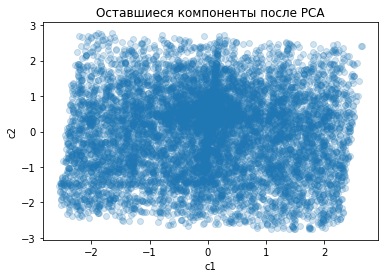

In [71]:
plt.scatter(X_PCA[:,0], X_PCA[:,1], alpha = .2)

plt.xlabel('c1')
plt.ylabel('c2')
plt.title('Оставшиеся компоненты после РСА')

### Используем kNN  (k = 5)

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

6999 3000


In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print("Train err: " + str(err_train)) 
print("Test err: " + str(err_test))

Train err: 0.16116588084012
Test err: 0.23166666666666666


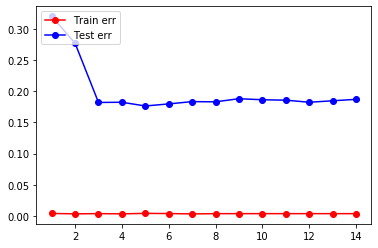

In [76]:
comp = range(1, 15, 1)
err_train_mas = []
err_test_mas = []
for temp in comp:
    pca = PCA(n_components = temp)
    X_PCA = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size = 0.3, random_state = 42)
    knn = KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)
    err_train_mas.append(np.mean(knn.predict(X_train) != y_train))
    err_test_mas.append(np.mean(knn.predict(X_test) != y_test))
plt.plot(comp, err_train_mas, 'r-o', label = 'Train err')
plt.plot(comp, err_test_mas,  'b-o', label = 'Test err')    
plt.legend(loc = 2)

Из графиков видно, что при количестве направлений больше 3 ошибка перестает уменьшаться и колеблеться примерно в окретности 17%. Данный результат не удивителен, по скольку решающую роль в играют X/Y(min/max) - как было выяснено ранее. Метод главных компонент не дал значительного улучшения на данном датасете